<a href="https://www.kaggle.com/code/mohammadalisafadoost/nya-asset-data-analysis?scriptVersionId=194556592" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style = " text-align:center; font-family:courier; font-size:300%; border: 1px solid; padding: 40px;" >
    <em>NYA Asset Data Analysis</em>
</h1>

<hr />

<h4 style = " font-family:courier; " >
<p>
    In this notebook we are going to do some analyze on NYA stock data
</p>
<blockquote cite = "https://en.wikipedia.org/wiki/NYSE_Composite">
    The NYSE Composite (NYA) is a stock market index covering all common stock listed on the New York Stock Exchange, including American depositary receipts, real estate investment trusts, tracking stocks, and foreign listings. It includes corporations in each of the ten industries listed in the Industry Classification Benchmark. It uses free-float market cap weighting.

Over 2,000 stocks are covered in the index, of which over 1,600 are from United States corporations and over 360 are foreign listings; however foreign companies are very prevalent among the largest companies in the index: of the 100 companies in the index having the largest market capitalization (and thus the largest impact on the index), more than half (55) are non-U.S   </blockquote>
<
</h4>

In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/stock-market/Market.csv') #read data
df = pd.DataFrame(data)
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110252 non-null  float64
 4   Low        110251 non-null  float64
 5   Close      110250 non-null  float64
 6   Adj Close  110244 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [4]:
df['Index'].describe()

count     112457
unique        14
top         N225
freq       14500
Name: Index, dtype: object

In [5]:
df1 = df[df['Index'] == 'NYA'] # Seperating NYA asset data 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13948 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13948 non-null  object 
 1   Date       13948 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13946 non-null  float64
 4   Low        13945 non-null  float64
 5   Close      13944 non-null  float64
 6   Adj Close  13938 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.7+ KB


<hr />

<H4>
<p>
    Fortunately missing values are very low , lets deal with them later on
</p>
</H4>

In [6]:
#Colors must be RGB for using in visualization libraries
rgb_colors = []
#personal chosen colors for data visualisation
colors = ['FEC601','EA8999','407182','861657','ADE25D','CBA1C4','92817A'] #HEX
def hex_to_rgb(hex): #Convert HEX to RGB
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal/256)
  
  return tuple(rgb)
for color in colors :
    rgb_colors.append(hex_to_rgb(color)) 
#rgb_colors
rgb_colors = sns.color_palette(palette=rgb_colors,n_colors=7)
rgb_colors 

[(0.9921875, 0.7734375, 0.00390625),
 (0.9140625, 0.53515625, 0.59765625),
 (0.25, 0.44140625, 0.5078125),
 (0.5234375, 0.0859375, 0.33984375),
 (0.67578125, 0.8828125, 0.36328125),
 (0.79296875, 0.62890625, 0.765625),
 (0.5703125, 0.50390625, 0.4765625)]

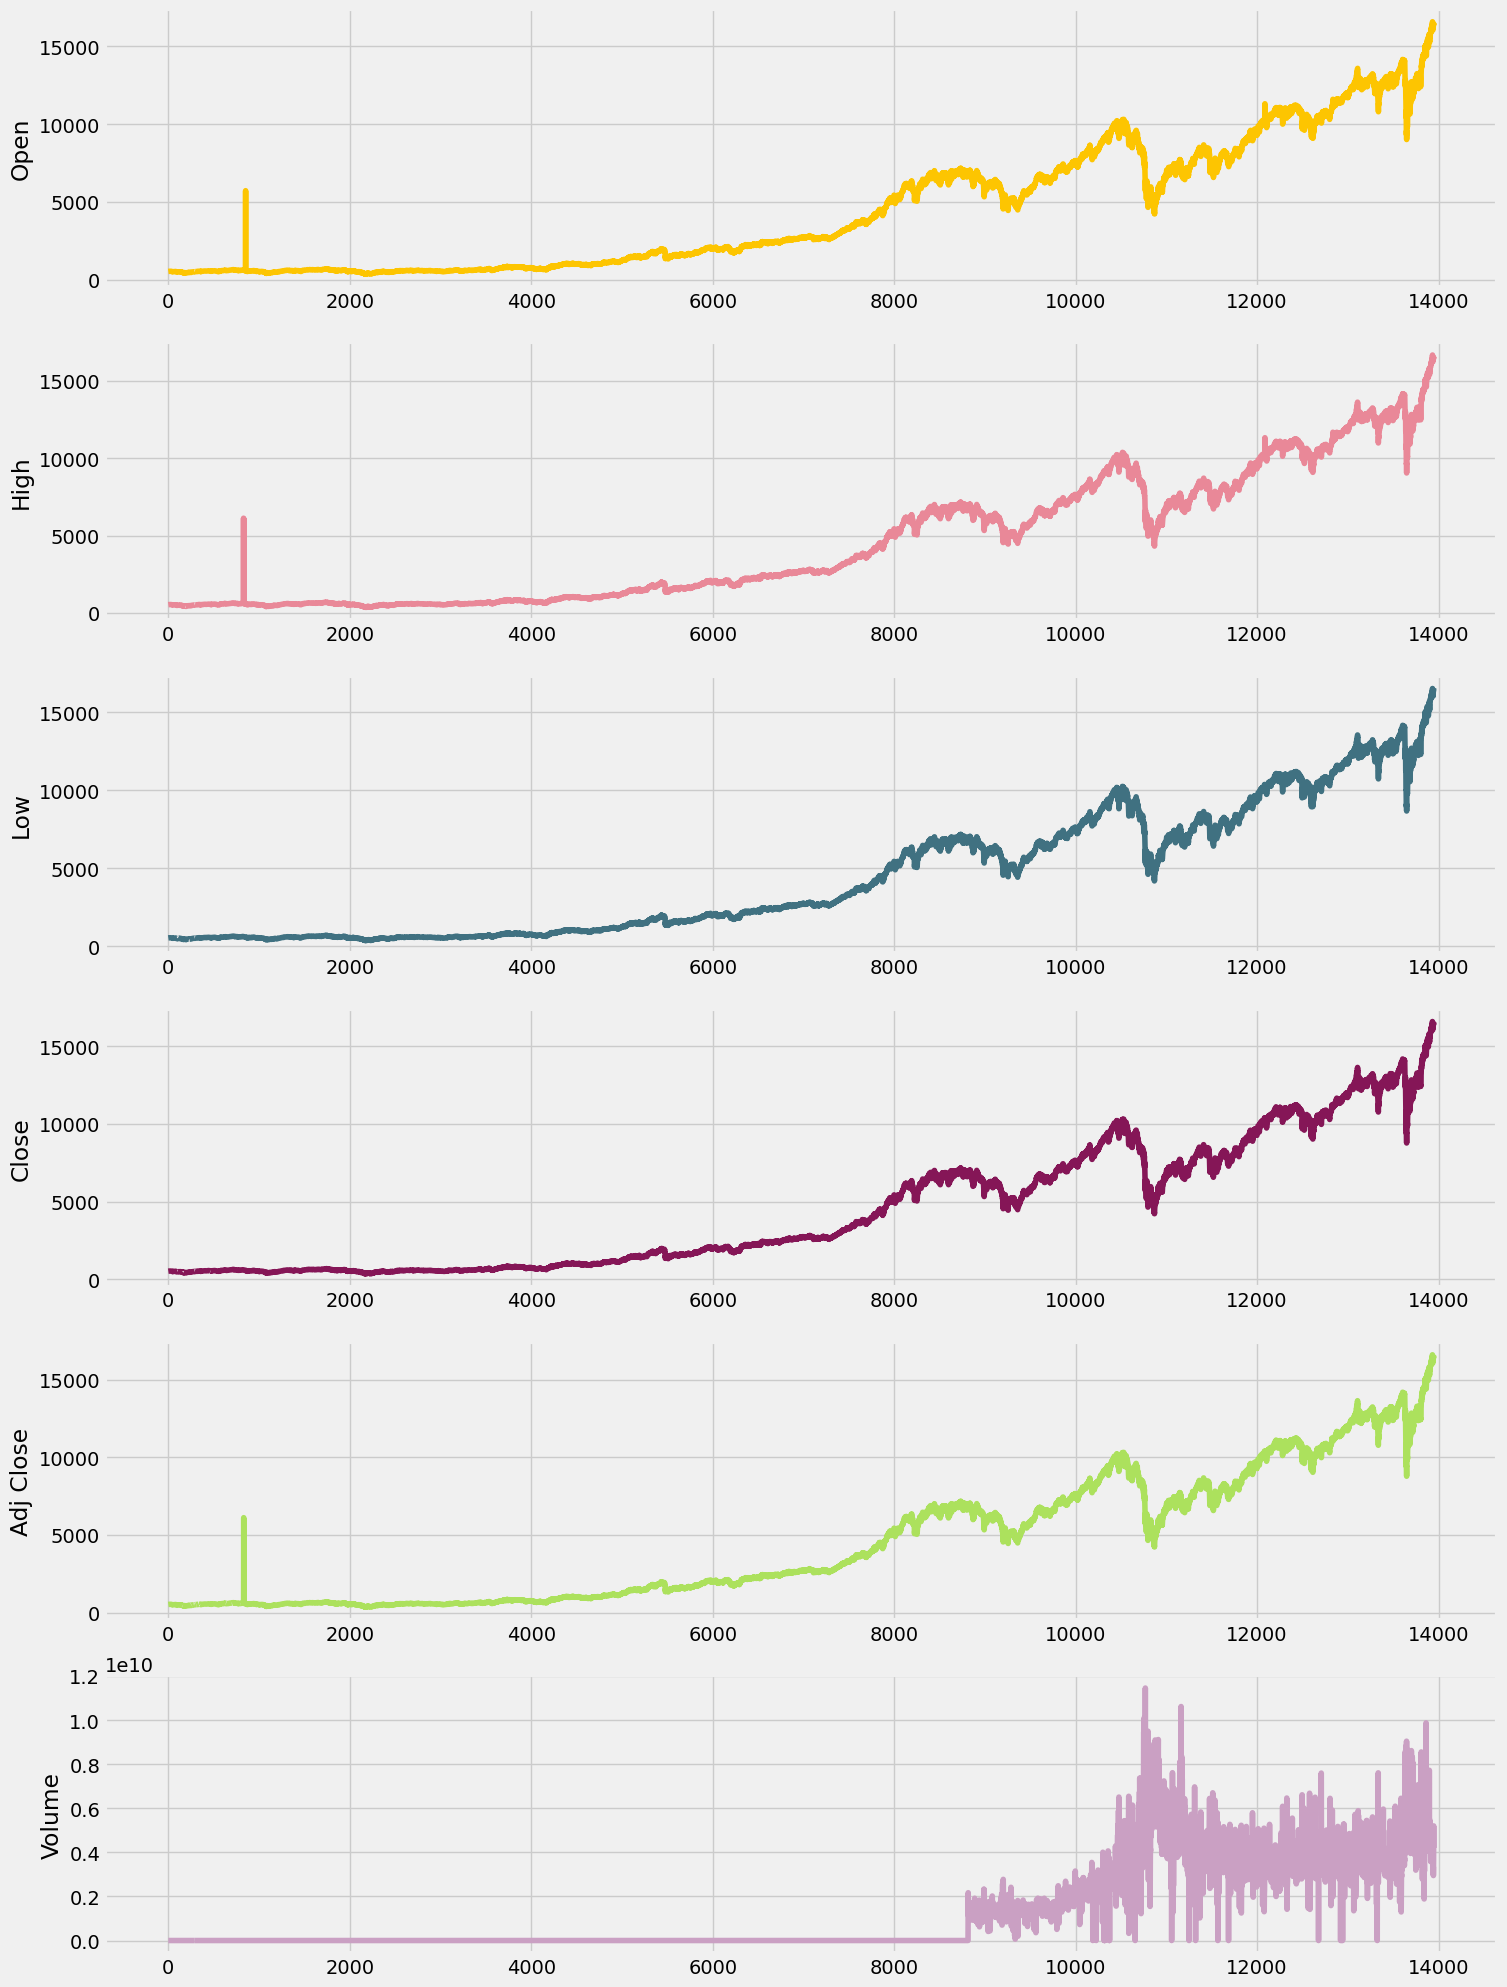

In [7]:
numeric_cols = df1.drop(['Index','Date'],axis=1).columns # Seperating other columns from numeric columns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,24))
for counter,col in enumerate(numeric_cols) : # Numeric columns line plot
    plt.subplot(6,1,counter+1)
    plt.plot(df1[f'{col}'],color=rgb_colors[counter])
    plt.ylabel(f'{col}')

<hr />

<h4>
<p>
    There seems to be some noise in Open , High and Adj Close columns lets find them , Volume column also contain so many inapropritiate values
</p>
</h4>

In [8]:
df1[numeric_cols][:2000].idxmax() # Highest value in first 2000 rows of numeric columns

Open          852
High          829
Low          1745
Close        1745
Adj Close     831
Volume          0
dtype: int64

<hr />

<H4>
    <p>
       Noise index in Open is 852 , in High is 829 and in Adg Close is 831 , so let see around this indexes 
    </p>
</H4>

In [9]:
print(
    df1['Open'][850:855],'\n--------\n',
    df1['High'][827:832],'\n--------\n',
    df1['Adj Close'][829:834]
     )  # View data that are suspected of being noise

850     569.289978
851     569.710022
852    5722.359985
853     574.679993
854     579.650024
Name: Open, dtype: float64 
--------
 827     618.349976
828     617.080017
829    6124.219971
830     610.530029
831     611.900024
Name: High, dtype: float64 
--------
 829     612.219971
830     610.530029
831    6110.900024
832     608.840027
833     606.830017
Name: Adj Close, dtype: float64


<hr />

<H4>
    <p>
        This noises seems to be some mistakes in data entry we can fix them if remove their fourth digit
    </p>
</H4>

In [10]:
noised_cols = ['Open','High','Adj Close']
for col in noised_cols : # Remove noise values
    for row in range(1000) :
        if len(str(df1.loc[row,col])) > 3 :
            df1.loc[row,col] = int(str(df1.loc[row,col])[:3])

In [11]:
# Change type of Date column to datetime and set it as index
df1['Date'] = pd.to_datetime(df1['Date'])
df1.sort_values('Date',inplace=True)
df1.set_index('Date',inplace=True)

In [12]:
df1.loc[df1['Volume'] > 0].head() # Data with volume greater than zero

,Index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2001-01-03,NYA,6968.830078,6968.830078,6968.830078,6968.830078,6968.830078,1.880700e+09
2001-01-04,NYA,6894.810059,6894.810059,6894.810059,6894.810059,6894.810059,2.169400e+09
2001-01-05,NYA,6774.060059,6774.060059,6774.060059,6774.060059,6774.060059,1.430800e+09
2001-01-08,NYA,6759.049805,6759.049805,6759.049805,6759.049805,6759.049805,1.115500e+09
2001-01-09,NYA,6754.819824,6754.819824,6754.819824,6754.819824,6754.819824,1.191300e+09


<hr />

<H4>
    <p>
        As you can see if we remove Volume column noises our remaining data starts from 2001 and it means more than half of our data will gone but its ok becouse we still have so many data and newer data are more valid than old ones but there seems to be another problem in data and it is that all column have equal valuse , lets check this one now .
    </p>
</H4>

In [13]:
equal_rows = []
for row in df1.index : # Finding rows with equal value in their columns
    if df1.loc[row,'Open']==df1.loc[row,'High']==df1.loc[row,'Low']==df1.loc[row,'Close']==df1.loc[row,'Adj Close'] :
        equal_rows.append(row)
df1.loc[equal_rows]

,Index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1966-10-24,NYA,446.000000,446.000000,446.000000,446.000000,446.000000,0.000000e+00
1967-01-18,NYA,494.000000,494.000000,494.000000,494.000000,494.000000,0.000000e+00
1968-05-17,NYA,575.000000,575.000000,575.000000,575.000000,575.000000,0.000000e+00
1968-07-11,NYA,610.000000,610.000000,610.000000,610.000000,610.000000,0.000000e+00
1969-09-04,NYA,551.000000,551.000000,551.000000,551.000000,551.000000,0.000000e+00
...,...,...,...,...,...,...,...
2003-01-02,NYA,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,1.229200e+09
2003-01-03,NYA,5148.450195,5148.450195,5148.450195,5148.450195,5148.450195,1.130800e+09
2003-01-06,NYA,5255.390137,5255.390137,5255.390137,5255.390137,5255.390137,1.398100e+09


<hr />

<H4>
    <p>
        There is equal values in columns until year 2003 so let start analizyng from 2004 forward
    </p>
</H4>

In [14]:
df1 = df1[df1.index > '2003-12-31'] 
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4382 entries, 2004-01-02 to 2021-05-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      4382 non-null   object 
 1   Open       4382 non-null   float64
 2   High       4382 non-null   float64
 3   Low        4382 non-null   float64
 4   Close      4382 non-null   float64
 5   Adj Close  4382 non-null   float64
 6   Volume     4382 non-null   float64
dtypes: float64(6), object(1)
memory usage: 273.9+ KB


<hr />

<H4>
    <p>
        As you can see missing value problems also has gone , lets plot them again
    </p>
</H4>

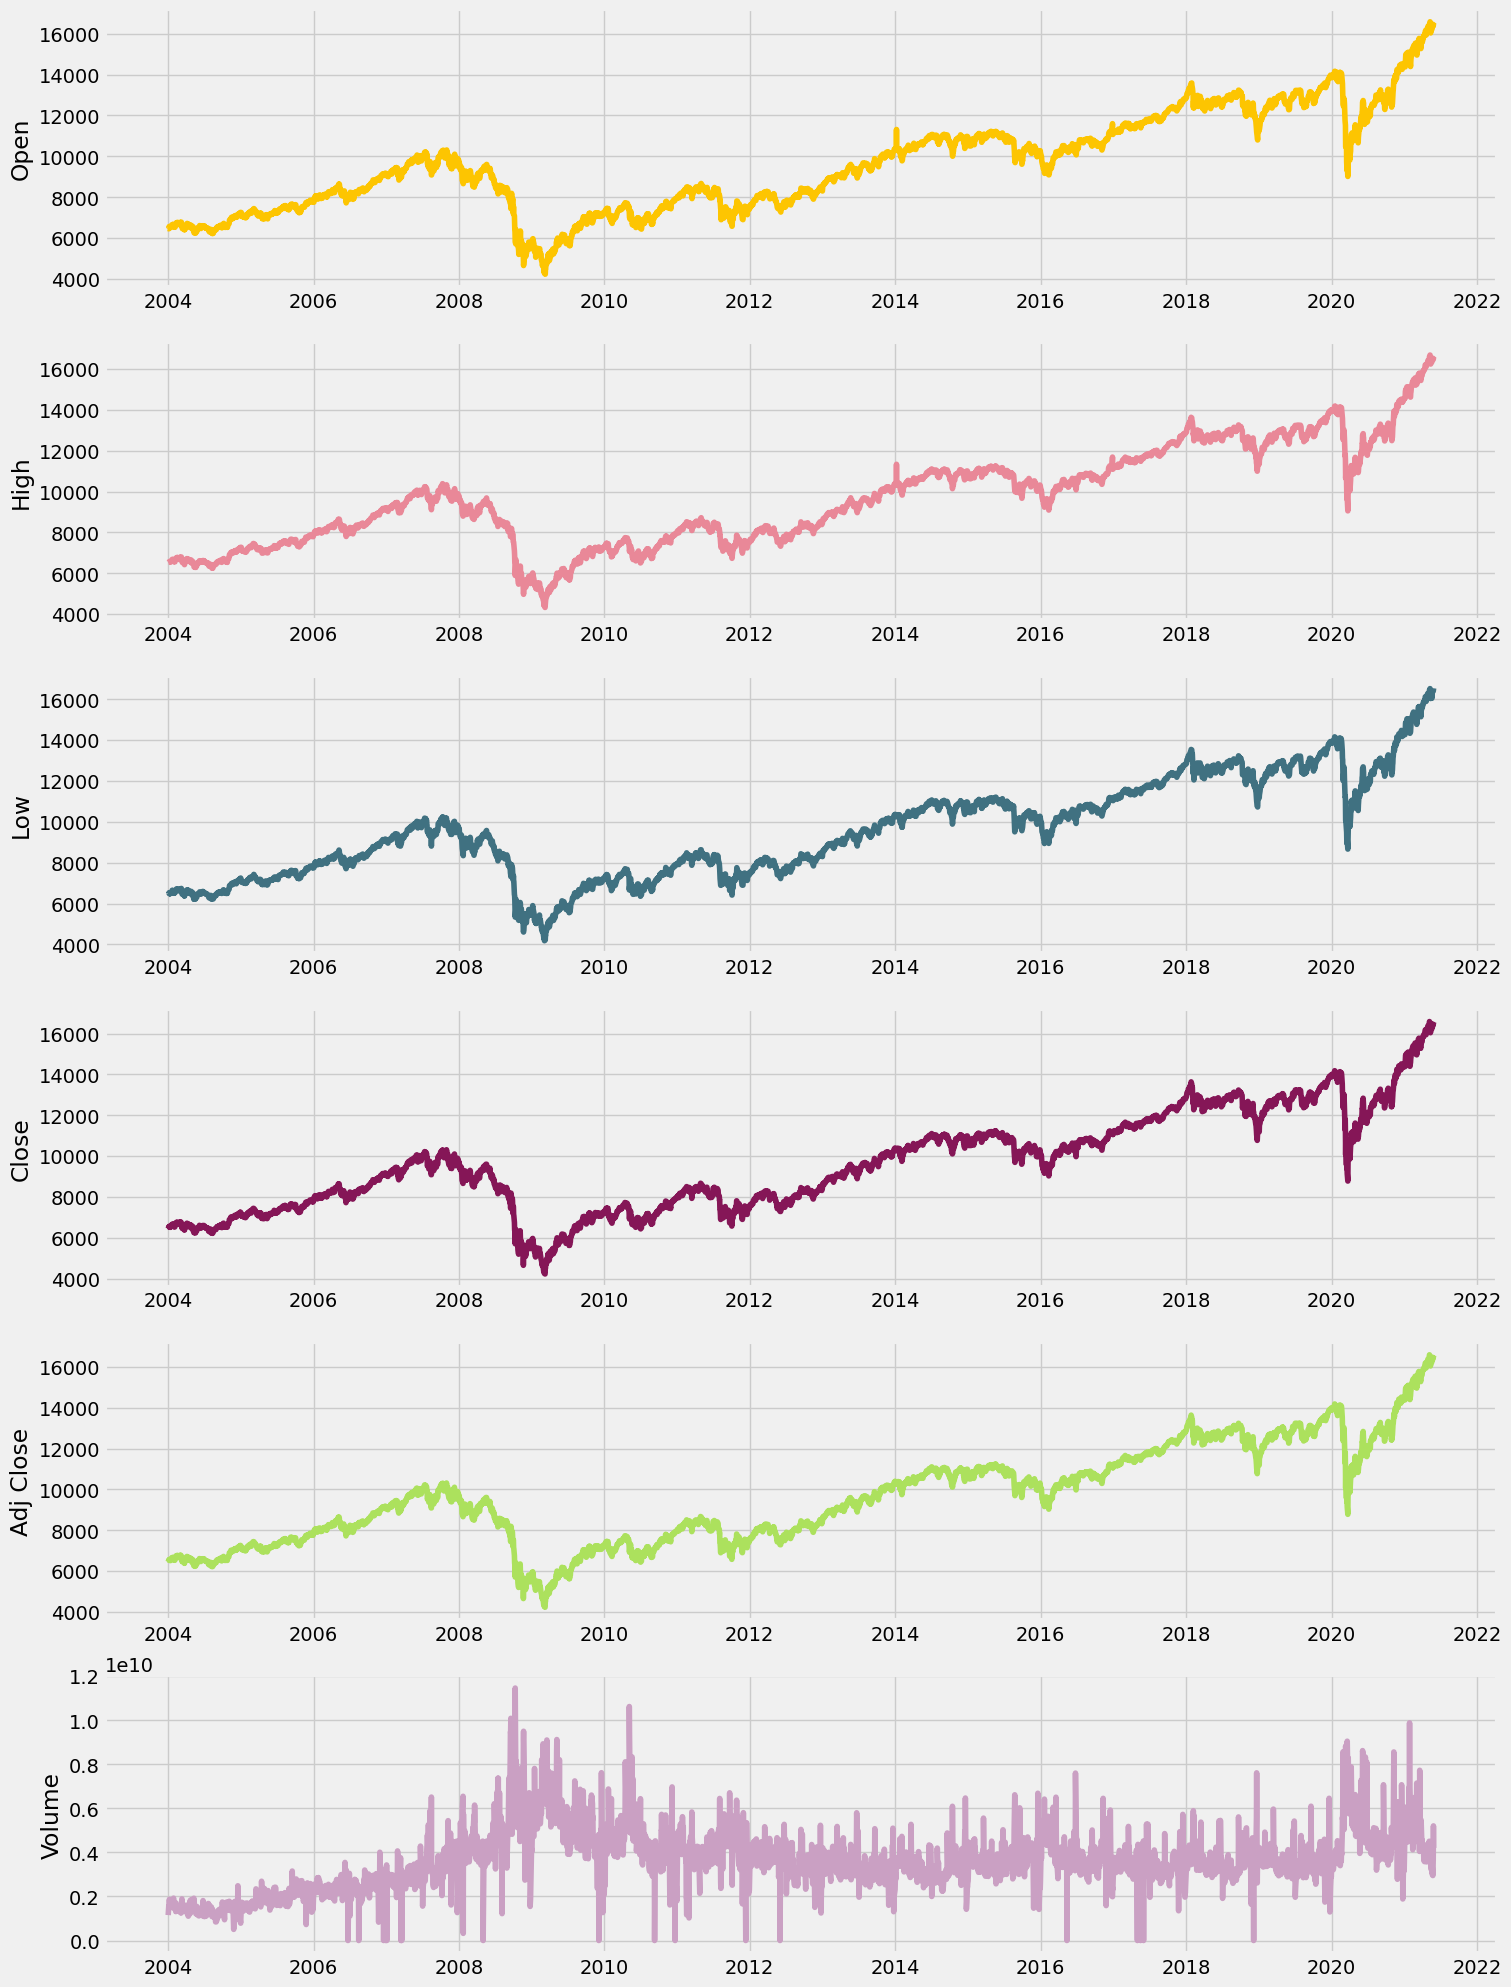

In [15]:
plt.figure(figsize=(16,24))
for counter,col in enumerate(numeric_cols) : # Plot line plots again after cleanup
    plt.subplot(6,1,counter+1)
    plt.plot(df1[f'{col}'],color=rgb_colors[counter])
    plt.ylabel(f'{col}')

In [16]:
# Resampling data
montly_df=df1.resample(rule='M').mean(numeric_only = True) 
quarterly_df=df1.resample(rule='Q').mean(numeric_only = True)
yearly_df=df1.resample(rule='A').mean(numeric_only = True)
weekly_df=df1.resample(rule='W').mean(numeric_only = True)

In [17]:
# Creating rsi column
change = df1["Close"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()

# 
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

df1['rsi'] = 100 * avg_up / (avg_up + avg_down)

In [18]:
# Using pyplot library to draw candlestick charts
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.03,
                    subplot_titles=('NYA_USD'), row_heights = [1, 0.3])
fig.add_trace(go.Candlestick(
                
                x = df1.index, # date values
                open = df1['Open'],
                high = df1['High'],
                low = df1['Low'],
                close = df1['Close'],
                
                # color or bars
                increasing_line_color = 'limegreen',
                decreasing_line_color = 'orangered',
                name='NYA_USD'),
                row = 1, 
                col = 1
             )
fig.add_trace( # Add yearly simple moving average
                      go.Scatter(x=yearly_df.index,
                                 y=yearly_df['Close'],
                                 line=dict(color='blue',
                                           width=1,
                                           shape='spline'), # smooth the line
                                 name='Yearly_SMA'),
                      row = 1, 
                      col = 1
             )
                      
fig.add_trace( # Add monthly simple moving average
                      go.Scatter(x=montly_df.index,
                                 y=montly_df['Close'],
                                 line=dict(color='black',
                                           width=1,
                                           shape='spline'), # smooth the line
                                 name='Monthly_SMA'),
                      row = 1, 
                      col = 1
             )

                      
fig.add_trace( # Add rsi
                    go.Scatter(x=df1.index,
                                 y=df1['rsi'],
                                 line=dict(color='orange',
                                           width=1,
                                           shape='spline'), # smooth the line
                                 showlegend = False
                               ),
                      row = 2, 
                      col = 1
             )
                      
# Mask a default range slider
fig.update_layout(xaxis_rangeslider_visible=False)

# Set layout size , margin and legend
fig.update_layout(
    height = 550 ,
    yaxis_title = 'Price',
    margin=dict(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0  #top margin
    ),
    legend=dict(
        x=0.02,  # Adjust the legend's x position
        y=0.98,  # Adjust the legend's y position
        font=dict(size=12)  # Customize font size
    )
)
fig.update_yaxes(type = 'log', row = 1, col = 1)
fig.update_yaxes(title_text = 'RSI', row = 2, col = 1)

<hr />

<H4>
    <p>
        The above picture shows the NYA candlestick chart and two simple moving averages, the blue line is the yearly moving average and the black line is the monthly moving average, you can also see the RSI chart at the bottom of the picture.
    </p>
</H4>

Text(0, 0.5, 'Residual')

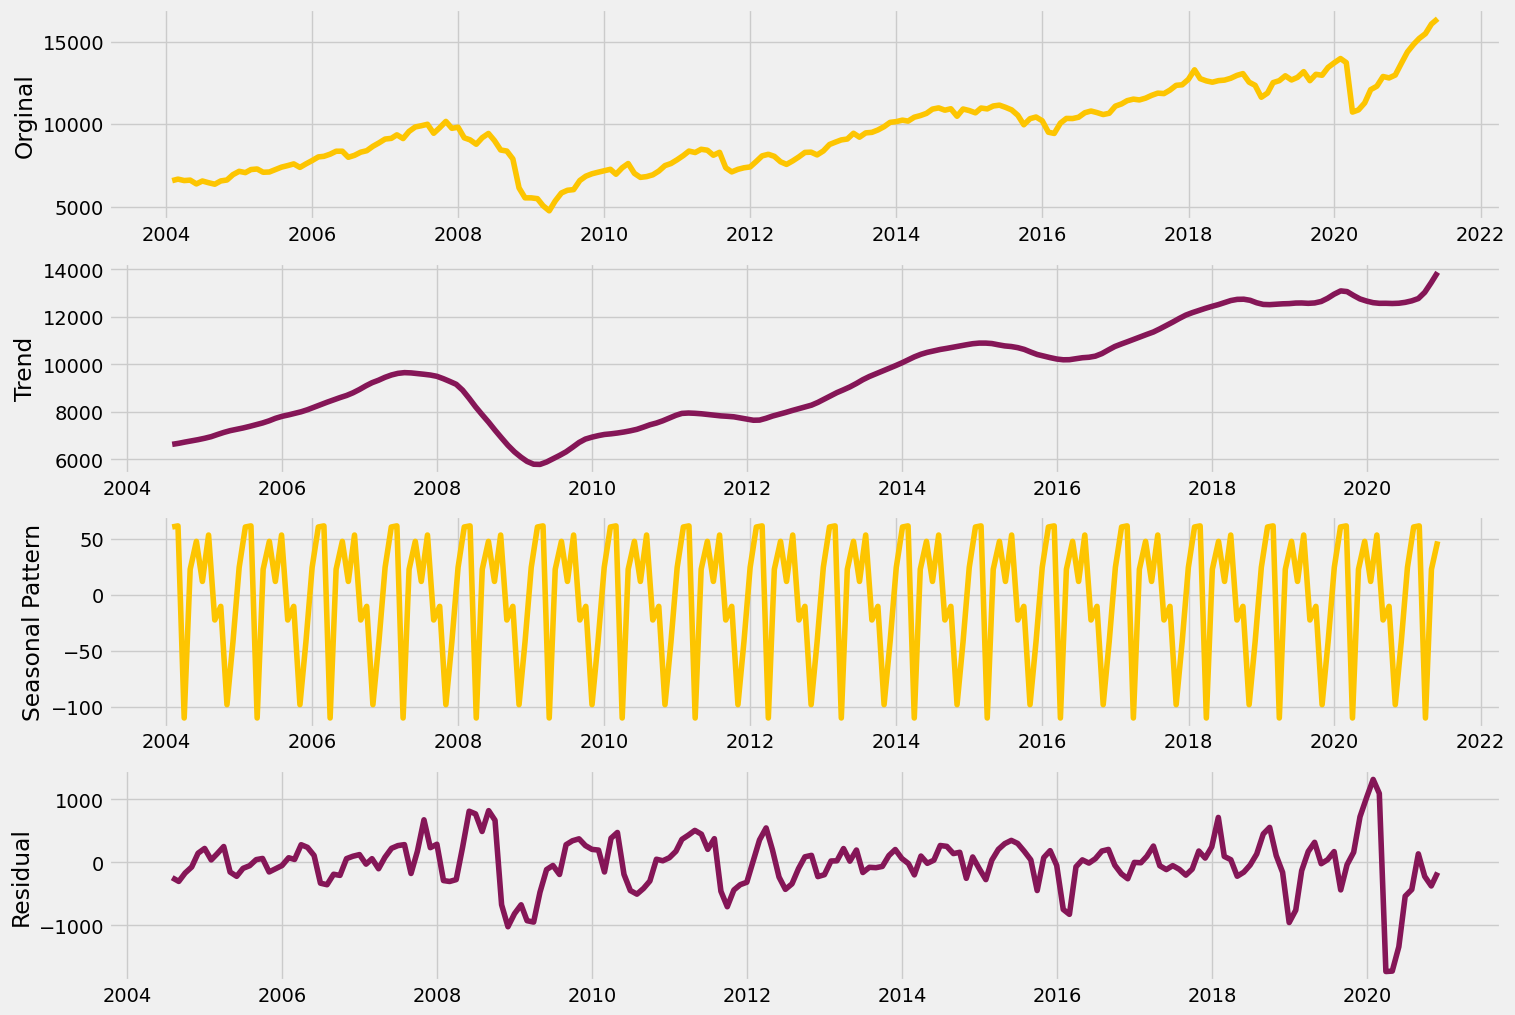

In [19]:
result = seasonal_decompose(montly_df['Close'], model='additive',period=12)
plt.figure(figsize=(16,12))
plt.subplot(411)
plt.plot(result.observed,color=rgb_colors[0]) # Original plot
plt.ylabel('Orginal')
plt.subplot(412)
plt.plot(result.trend,color=rgb_colors[3]) # Trend plot
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(result.seasonal,color=rgb_colors[0]) # Seasonal plot
plt.ylabel('Seasonal Pattern')
plt.subplot(414)
plt.plot(result.resid,color=rgb_colors[3]) # Residual plot
plt.ylabel('Residual')

<hr />

<H4>    
        There is 4 charts in above picture :
        <ol>
        <li>
        The first chart is monthly moving average of Close column 
        </li>
        <li>
        Second chart is trend of first chart :
            <blockquote>
            the trend shows a general direction of the time series data over a long period of time. It represents a long-term progression of the series
            </blockquote>
        </li>
        <li>
        third chart is seasonal pattern of first chart :
            <blockquote>
            the seasonal component with fixed and known period. It is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors: annual, monthly or weekly. 
            </blockquote>
        </li>
        <li>
            Last chart is residuals of first chart :
            <blockquote>
             the irregular component (residuals) consists of the fluctuations in the time series that are observed after removing trend and seasonal / cyclical variations.
            </blockquote>
        </li>
          </ol>
    residual chart is a better option than original chart for analyze and forecast because it shows every sudden move or any irregular change in values .
</H4>

Text(0.5, 1.0, 'lag plot')

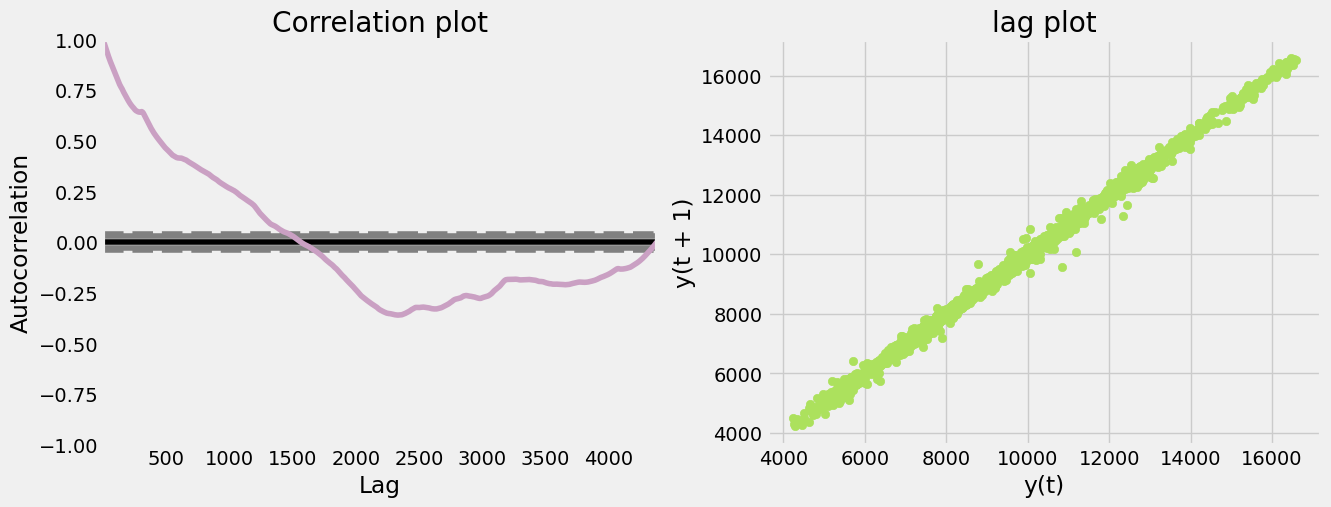

In [20]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
pd.plotting.autocorrelation_plot(df1['Close'],color=rgb_colors[5]) # Correlation plot
plt.title('Correlation plot')
plt.subplot(1,2,2)
pd.plotting.lag_plot(df1['Close'],c = rgb_colors[4],lag=1) # Lag plot
plt.title('lag plot')

<hr />

<H4>
    <p>
        On the left side is the autocorrelation graph, which shows the correlation of a value and its lags, lag one means the previous value and lag 1000 means the thousandth value before it. As you can see correlation comes down with time .
        Right chart shows that there is a strong positive correlation between today Close price with yesterday Close price.
    </p>
</H4>